R square is 0.885970070442841 Adjust R square is 0.8796350743563321

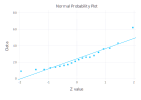

In [7]:
using SymPy
using Gadfly
using Statistics
function NPP(data)  # Normal probability plot
    n = length(data) ##the size of data
    data = sort(data) ##Sort the data
    q = zeros(length(data))  # create a array of quantile
    
    ## calculate the quantile from 1 to n
    i = 1
    for i = 1: n  
        quantile = (i - 0.5)/n
        q[i] = quantile
    end

    z = zeros(length(data)) # create a array of z score
    ## Calculate the Z-value for each quantile
    j = 1
    for j = 1:n
        x = Sym("x")
        x1 = integrate(exp(-(x^2/2)), (x, -Inf, x))
        x2 = 1/sqrt(2 * pi)
        z_value = float(solve(x1*x2 - q[j],x))
        z[j] = z_value[1]
    end

    ## OLS
    #convert dataset
    data = convert(Array{Float64,1},data)
    z = convert(Array{Float64,1},z)
    
    ## c represent intercept
    c = ones(size(data,1)) 
    
    y = data
    x = [c z]
    
    ## coef
    b = inv(x'x)*(x'y) 
    u = y - x*b 

    ## sum of y-mean(y)
    sum_y = [] 
    for i = 1:length(u)
        result = (y[i]-mean(y))*(y[i]-mean(y))
        push!(sum_y,result)
    end
    
    # calculate R^2 and R^2 adjust
    sum_y = sum(sum_y)
    r2 = 1-(u'*u)/sum_y
    r2a = 1-((u'*u)/(size(u,1) - size(x,2)))/(sum_y/(size(u,1)-1))
    print("R square is", " ", r2)
    print(" Adjust R square is", " ", r2a)
    
    # plot 

    Gadfly.plot(layer(x = z,y=data,Geom.point),
        layer(x = z,y=data,intercept = [b[1]],slope = [b[2]],Geom.abline),
        Guide.xlabel("Z value"), Guide.ylabel("Data"), Guide.title("Normal Probability Plot"))

    #Plots.histogram(data, title="Histogram", legend=:none)

end

#test 1
data = [9,11,11,13,14,15,16,17,19,21,23,25,26,26,28,32,36,37,43,62]
NPP(data)



R square is 0.9854685146758814 Adjust R square is 0.9853202342133904

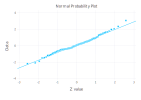

In [6]:
#test 2
data_1 = randn(100)
NPP(data_1)

R square is 0.972954115828228 Adjust R square is 0.9714515667075739

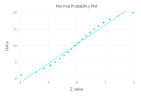

In [8]:
#test3
data_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
NPP(data_2)